In [1]:
from astropy.table import Table, Column
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import pandas as pd
from stacker import stacker, ParStacker
from scipy.io import loadmat   
df_0 = pd.read_csv('../data/data_0.csv')
df_scaled = pd.read_csv('../data/data_scaled.csv')
tab = Table.read('../data/reduced_dr16q.fits')

FIBERID = tab['FIBERID']
MJD = tab['MJD']
PLATE = tab['PLATE']
Z = tab['Z']

In [2]:
MatFile =loadmat('../AgglomerativeClustering/dbscan-idx-eps-1.5-mpt-10')
labels = MatFile['idx']
labels_np = np.array(labels)
num_clusters = max(labels)

# # median spectrum out of all objects in the main cluster -> label=0
# MedSpec=[]
cl_pop=[]
for cl in range(-1,14):#num_clusters.item(0)+1):
    mask=[]
    pop=0
    for i in range(len(labels)):
        mask.append(labels.item(i)==cl)
        if(labels.item(i)==cl):
            pop=pop+1
    cl_pop.append(pop)
#     MedSpec = stacker(Z[mask], PLATE[mask], MJD[mask], FIBERID[mask])
#     np.savetxt('MedSpec-db-cl%d-tSNE-2d-eps-1.5-MinPts-10.dat' %cl, MedSpec)

In [3]:
 cl_pop

[13, 0, 173828, 104, 1271, 991, 606, 471, 173, 256, 159, 46, 20, 14, 33]

In [12]:
color['cmap']

array([[0.        , 0.        , 1.        ],
       [0.        , 0.33333333, 1.        ],
       [0.        , 0.66666667, 1.        ],
       [0.        , 1.        , 1.        ],
       [0.33333333, 1.        , 0.66666667],
       [0.66666667, 1.        , 0.33333333],
       [1.        , 1.        , 0.        ],
       [1.        , 0.66666667, 0.        ],
       [1.        , 0.33333333, 0.        ]])

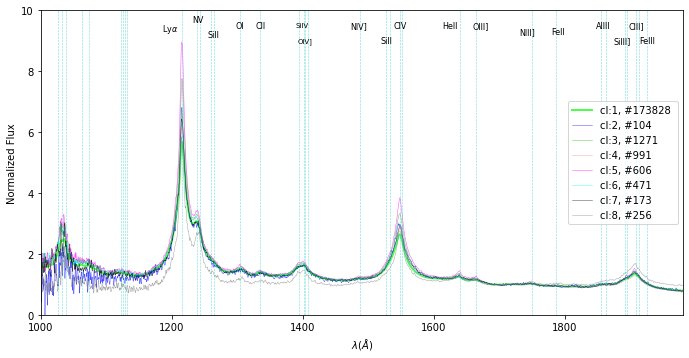

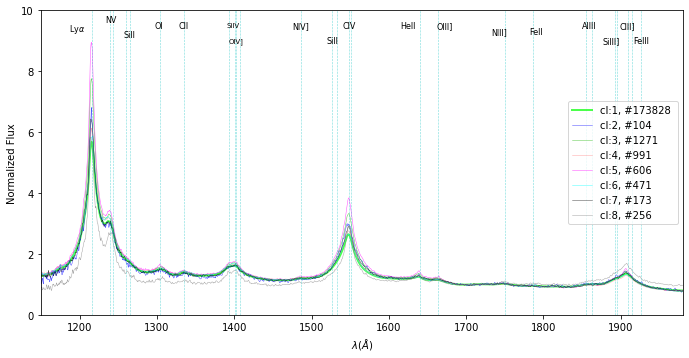

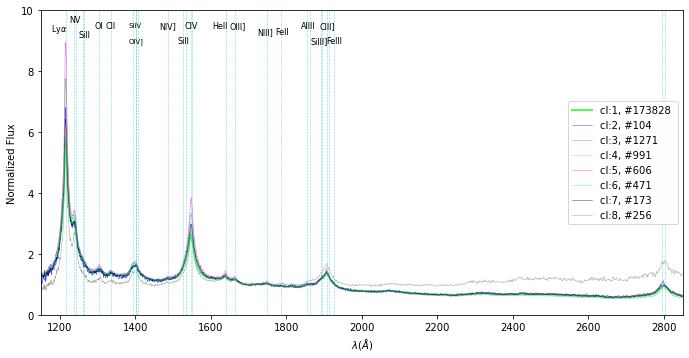

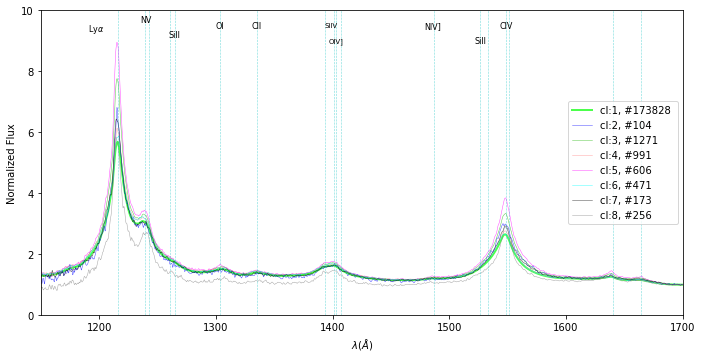

In [20]:
# Plotting Spectra -> REW

from scipy import ndimage
from line_db import line_db

c=['gray', 'C0', 'C1', 'C2', 'C3' , 'darkred']
ymax=10

ymin=0.02*ymax
fs=8
fs1=7
y_median = 0.95*ymax
med_step=.8
legend_loc=7

# -----------
step = 1.00015
bb = np.arange(0,8813,1)
wgrid = 800.0 * step**bb
nw = len(bb)

#  Median properties in each bin
color = loadmat('cmap.mat')
# color = color['cmap']

color=[ 
[0,	0, 0],
[1,0,0],
[0,	1, 0],
[0, 0, 1],
[0.1,.7,0],
[1,0.5,0.5],
[1,0,1],
[0,1,1],
[0,0,0],
[0.5,0.5,0.5]]
# color = ['C0', 'gray', 'C2', [0.51,0,0], 'C4', 'C5', 'C7', 'C8', 'black', 'blue', 'C8', 'gray']
for ii in range(4):

    if(ii==0): lambda_min = 1000; lambda_max = 1980
    if(ii==1): lambda_min = 1150; lambda_max = 1980
    if(ii==2): lambda_min = 1150; lambda_max = 2850
    if(ii==3): lambda_min = 1150; lambda_max = 1700
    fig = plt.figure(figsize=(11.5,5.6))
    plt.xlim(lambda_min,lambda_max)
    plt.ylim(ymin, ymax)
    plt.ylabel('Normalized Flux')
    plt.xlabel(r'$\lambda  (\AA)$')
    x_median=lambda_min+200
       
  
    
#     for cl in range(-1,num_clusters.item(0)+1):
    for cl in range(0,9):
        if(cl!=0):
    
            MedSpec = np.loadtxt('MedSpec-db-cl%d-tSNE-2d-eps-1.5-MinPts-10.dat' %cl)
            SmoothedMedSpec = ndimage.filters.gaussian_filter1d(MedSpec,2.0)
      
            # masking for plot ranges
            ind = (wgrid>lambda_min) & (wgrid<lambda_max)
    
            #plotting
            
            if(cl==1): 
                plt.plot(wgrid[ind],  SmoothedMedSpec[ind], c=color[cl], label = 'cl:%d, #%d '%(cl, cl_pop[cl+1]), lw=2, alpha=0.7)
            else:
                plt.plot(wgrid[ind],  SmoothedMedSpec[ind], c=color[cl], label = 'cl:%d, #%d '%(cl, cl_pop[cl+1]), lw=0.5, alpha=0.7)
                
                    
        #     plt.plot(wgrid[ind],  SmoothedMedSpec_N2[ind],   c=c[4], label = 'Noise-2: #%d'    %(sum(label_noise==2)), lw=1, alpha=0.8)
        #     plt.plot(wgrid[ind],  SmoothedMedSpec_N3[ind],   c=c[4], label = 'Noise-3: #%d'    %(sum(label_noise==3)))
        #     plt.plot(wgrid[ind],  SmoothedMedSpec_N4[ind],   c=c[5], label = 'Noise-4: #%d'    %(sum(label_noise==4)))
    plt.legend(loc=7)
    line_db(ymax, fs, fs1, ii) 
    fig_path = 'med-spec-%d-%d-tSNE-db.png'%(lambda_min, lambda_max)
    plt.savefig(fig_path, format='png', dpi=800, bbox_inches='tight')
    plt.show()




In [ ]:
#  Investigating median properties 
Z0 = Z[labels==0]
Z_noise = Z[labels==-1]
Z_noise_noise = Z_noise[label_noise==-1]

plt.hist(Z0, density=True, alpha=0.7, color ='gray')
# plt.hist(Z_noise, density=True, alpha=0.3, color='red')
plt.hist(Z_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('Z')
plt.show()

In [ ]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
#  Investigating median properties 
Fui0 = Fuz[labels==0]
Fui_noise = Fui[labels==-1]
Fui_noise_noise = Fui_noise[label_noise==-1]

plt.hist(Fui0, density=True, alpha=0.7, color ='gray')
# plt.hist(Fui_noise, density=True, alpha=0.3, color='red')
plt.hist(Fui_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(u-i)')
plt.show()

In [ ]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
Fuz0 = Fuz[labels==0]
Fuz_noise = Fuz[labels==-1]
Fuz_noise_noise = Fuz_noise[label_noise==-1]

plt.hist(Fuz0, density=True, alpha=0.7, color ='gray')
# plt.hist(Fuz_noise, density=True, alpha=0.3, color='red')
plt.hist(Fuz_noise_noise, density=True, alpha=0.3, color='blue')
plt.show()

In [ ]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
#  Investigating median properties 
FuW10 = FuW1[labels==0]
FuW1_noise = FuW1[labels==-1]
FuW1_noise_noise = FuW1_noise[label_noise==-1]

p,h,p2 =plt.hist(FuW10, density=True, alpha=0.7, color ='gray')
# plt.hist(FuW1_noise, density=True, alpha=0.3, color='red')
p0, h0, p2= plt.hist(FuW1_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(u-W1)')
plt.savefig('histFuw1.png', dpi=1800)
plt.show()

In [ ]:

# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
FuW20 = FuW2[labels==0]
FuW2_noise = FuW2[labels==-1]
FuW2_noise_noise = FuW2_noise[label_noise==-1]

plt.hist(FuW20, density=True, alpha=0.7, color ='gray')
# plt.hist(FuW2_noise, density=True, alpha=0.3, color='red')
plt.hist(FuW2_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(u-W2)')
plt.savefig('histFuw2.png', dpi=1800)

plt.show()

In [ ]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
Fgz0 = Fgz[labels==0]
Fgz_noise = Fgz[labels==-1]
Fgz_noise_noise = Fgz_noise[label_noise==-1]

plt.hist(Fgz0, density=True, alpha=0.7, color ='gray')
# plt.hist(Fgz_noise, density=True, alpha=0.3, color='red')
plt.hist(Fgz_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(g-z)')

plt.show()

In [ ]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
FgW10 = FgW1[labels==0]
FgW1_noise = FgW1[labels==-1]
FgW1_noise_noise = FgW1_noise[label_noise==-1]

plt.hist(FgW10, density=True, alpha=0.7, color ='gray')
# plt.hist(FgW1_noise, density=True, alpha=0.3, color='red')
plt.hist(FgW1_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(g-W1)')

plt.show()

In [ ]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
FgW20 = FgW2[labels==0]
FgW2_noise = FgW2[labels==-1]
FgW2_noise_noise = FgW2_noise[label_noise==-1]

plt.hist(FgW20, density=True, alpha=0.7, color ='gray')
# plt.hist(FgW1_noise, density=True, alpha=0.3, color='red')
plt.hist(FgW1_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(g-W2)')

plt.show()

In [ ]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
FrW10 = FrW1[labels==0]
FrW1_noise = FrW1[labels==-1]
FrW1_noise_noise = FrW1_noise[label_noise==-1]

plt.hist(FrW10, density=True, alpha=0.7, color ='gray')
# plt.hist(FrW1_noise, density=True, alpha=0.3, color='red')
plt.hist(FrW1_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(r-W1)')

plt.show()

In [ ]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
FgW20 = FgW2[labels==0]
FgW2_noise = FgW2[labels==-1]
FgW2_noise_noise = FgW2_noise[label_noise==-1]

plt.hist(FgW20, density=True, alpha=0.7, color ='gray')
# plt.hist(FgW2_noise, density=True, alpha=0.3, color='red')
plt.hist(FgW2_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(r-W2)')

plt.show()

In [ ]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
FrW10 = FrW1[labels==0]
FrW1_noise = FrW1[labels==-1]
FrW1_noise_noise = FrW1_noise[label_noise==-1]

plt.hist(FrW10, density=True, alpha=0.7, color ='gray')
# plt.hist(FrW1_noise, density=True, alpha=0.3, color='red')
plt.hist(FrW1_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(i-W2)')

plt.show()

In [ ]:
# ['Fui', 'Fuz', 'FuW1', 'FuW2', 'Fgz', 'FgW1', 'FgW2', 'FrW1', 'FrW2', 'FiW2'])
FW1W20 = FW1W2[labels==0]
FW1W2_noise = FW1W2[labels==-1]
FW1W2_noise_noise = FW1W2_noise[label_noise==-1]

plt.hist(FW1W20, density=True, alpha=0.7, color ='gray')
# plt.hist(FrW1_noise, density=True, alpha=0.3, color='red')
plt.hist(FW1W2_noise_noise, density=True, alpha=0.3, color='blue')
plt.title('F(W1-W2)')

plt.show()

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
data_with_clust = pd.concat([df,pd.DataFrame({'cluster':this_labels})], axis = 1)
#print(data_with_clust.head())
outlier=data_with_clust[data_with_clust['cluster']!=0]
#print(outlier.head())
pca=PCA(n_components=3)
principal_comp=pca.fit_transform(df)
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2', 'pca3'])
# pca_df.head()
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':this_labels})], axis = 1)
pca_df.head()
# plt.figure(figsize=(10,10))
# filt=(pca_df['cluster']<1)
# #print(pca_df[filt].head())
# #ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df[filt])
# ax = sns.scatterplot(x="pca1", y="pca2", z="pca3", hue = "cluster", data = pca_df)
# plt.show()
# print(len(outlier))
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


# %matplotlib

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = FuW1 # pca_df['pca1']
# y = FuW2 #pca_df['pca2']
z = FiW2 #pca_df['pca3']

ax.set_xlabel("pca1")
ax.set_ylabel("pca2")
ax.set_zlabel("pca3")
cc=['red', 'gray']
color=[]
for i in range(len(df)):
    color.append(cc[int(this_labels[i])+1])
ax.scatter(x,  z, c=color, alpha=0.4, s=1)

plt.show()